In [1]:
theta1 = [0.31, 0.18, 0.65, 0.25, 5]  # true values
theta_n1 = [0.372, 0.216, 0.78, 0.3, 6.0] # nominal values +20%
theta_min1 = [0.155, 0.09, 0.325, 0.125, 2.5]   # minimum values -50%
theta_max1 = [0.465, 0.27, 0.975, 0.375, 7.5]  # maximum values +50%
theta_maxs1 = [hi / nom for hi, nom in zip(theta_max1, theta_n1)]
theta_mins1 = [lo / nom for lo, nom in zip(theta_min1, theta_n1)]

In [2]:
system = {
    'tvi': {  # Time-variant input variables (models input: tvi), each key is a symbol nad key in tvi as well
        'u1': {  # Temperature (K)
            'stps': 5,  # Number of switching times in CVPs (vector parametrisation resolution in time dimension):
            # Must be a positive integer > 1. swps-1 is the number of steps
            'const': 'rel',  # Constraint type: relative state of signal levels in CVPs
            # 'rel' (relative) ensures relaxation, 'dec' (decreasing) ensures decreasing signal levels, 'inc' (increasing) ensures increasing signal levels
            'max': 0.2,  # Maximum allowable signal level, des_opt space upper bound
            'min': 0.05,  # Minimum allowable signal level, des_opt space lower bound
            'cvp': 'CPF',  # Design CVP method (CPF - constant profile, LPF - linear profile)
            'offl': 0.01,  # minimum allowed perturbation of signal (ratio)
            'offt': 0.5  # minimum allowed perturbation of time (ratio)
        },
        'u2': {  # Temperature (K)
            'stps': 5,  # Number of switching times in CVPs (vector parametrisation resolution in time dimension):
            # Must be a positive integer > 1. swps-1 is the number of steps
            'const': 'dec',  # Constraint type: relative state of signal levels in CVPs
            # 'rel' (relative) ensures relaxation, 'dec' (decreasing) ensures decreasing signal levels, 'inc' (increasing) ensures increasing signal levels
            'max': 35,  # Maximum allowable signal level, des_opt space upper bound
            'min': 5,  # Minimum allowable signal level, des_opt space lower bound
            'cvp': 'CPF',  # Design CVP method (CPF - constant profile, LPF - linear profile)
            'offl': 5,  # minimum allowed perturbation of signal (ratio)
            'offt': 0.5  # minimum allowed perturbation of time (ratio)
        },
    },
    'tvo': {  # Time-variant output variables (responses, measured or unmeasured)
        'y1': {  # response variable, here carbonation efficiency
            'init': 0,  # Initial value for the response variable, it can be a value, or 'variable' for case it is a des_opt decision (time-invariant input variable)
            'meas': True,  # Flag indicating if this variable is directly measurable, if False, it is a virtual output
            'sp': 6,  # the amound of samples per each round (run)
            'unc': 0.05,  # amount of noise (standard deviation) in the measurement, in case of insilico, this is used for simulating a normal distribution of noise to measurement (only measurement)
            'offt': 0.5,  # minimum allowed perturbation of sampling times (ratio)
            'samp_s': 1,  # Matching criterion for models prediction and data alignment
            'samp_f': [0, 10],  # fixed sampling times
        },
        'y2': {  # response variable, here carbonation efficiency
            'init': 0,  # Initial value for the response variable, it can be a value, or 'variable' for case it is a des_opt decision (time-invariant input variable)
            'meas': True,  # Flag indicating if this variable is directly measurable, if False, it is a virtual output
            'sp': 6,  # the amound of samples per each round (run)
            'unc': 0.05,  # amount of noise (standard deviation) in the measurement, in case of insilico, this is used for simulating a normal distribution of noise to measurement (only measurement)
            'offt': 0.5,  # minimum allowed perturbation of sampling times (ratio)
            'samp_s': 1,  # Matching criterion for models prediction and data alignment
            'samp_f': [0, 10],  # fixed sampling times
        },
    },
    'tii': {  # Time-invariant input variables (tii)
        'y10': {  # 1st symbolic time-invariant control, Density of solid reactant (kg/m³)
            'max': 10,  # Maximum allowable signal level, des_opt space upper bound
            'min': 1  # Minimum allowable signal level, des_opt space upper bound
        },
        'y20': {  # 1st symbolic time-invariant control, Density of solid reactant (kg/m³)
            'max': 10,  # Maximum allowable signal level, des_opt space upper bound
            'min': 1  # Minimum allowable signal level, des_opt space upper bound
        },
    },
    'tio': {  # Time-invariant output variables (empty here, could hold steady state responses that hold no dependency)
    },
    't_s': [0, 10],  # Time span  (600 s to 10,800 s), duration of numerical perturbations (the rest is precluded from des_opt)
    't_r': 0.02,  # Time resolution (10 s), minimum time steps for the simulation/des_opt/controls
    't_d': 0.5
}

In [3]:
models = { # Settings related to the rival models and their parameters
    'can_m': ['M'],  # Active solvers (rival models) to be used in the experiment
    'krt': {'M': 'pys'},  # Kernel type for each model, 'pys' for python standalone scripts, 'pym' for middoe.krnl_models, 'gpr' for gPAS models
    # type of the model interface, 'pym' for middoe.krnl_models, 'gpr' for gPAS models, function name for globally defined functions, 'pys' for python standalone scripts
    'creds': {'M': '@@TTmnoa698'},
    # credentials for gPAS models, if not needed, leave empty
    'src': {'M': 'C:/Users/Tadmin/PycharmProjects/middoe/tests/case study case study 2 poster/model.py'},
    # for now for gPAS readable files, or python standalone scripts

    'theta': { # Theta parameters for each models
        'M': theta_n1
    },
    't_u': { # Maximum bounds for theta parameters (based on normalized to'f20': theta20mins, 1)
        'M': theta_maxs1
    },
    't_l': { # Minimum bounds for theta parameters (based on normalized to 1)
        'M': theta_mins1
    }
}

In [4]:
insilicos = { # Settings for the insilico data generation
    'tr_m': 'M', # selected true models (with nominal values)
    'theta': theta1,
    'errt': 'rel',  # error type, 'rel' for relative error, 'abs' for absolute error
    'prels': { # classic des_opt settings, sheet name is the round run name, each sheet contains the data for the round, iso space.
        '1': {'u1': 0.125, 'u2':20, 'y10': 5.5, 'y20': 5.5},
        '2': {'u1': 0.2, 'u2':35, 'y10': 10, 'y20': 10},
        '3': {'u1': 0.1625, 'u2':27.5, 'y10': 7.75, 'y20': 7.75},
    }
}

In [5]:
from middoe.krnl_expera import expera
expera(system, models, insilicos, design_decisions={}, expr=1)


[✓] In-silico data saved to: C:\Users\Tadmin\PycharmProjects\middoe\tests\case study poster\indata.xlsx
[INFO] Model used         : M
[INFO] Design case        : classic/preliminary
[INFO] Responses simulated:
   - y1         | measurable      | std.dev = 0.05
   - y2         | measurable      | std.dev = 0.05


(WindowsPath('C:/Users/Tadmin/PycharmProjects/middoe/tests/case study poster/indata.xlsx'),
      MES_X:y1  MES_Y:y1  MES_E:y1  MES_X:y2  MES_Y:y2  MES_E:y2  X:all  y10  \
 0         0.0  5.601845      0.05       0.0  5.545550      0.05   0.00  5.5   
 1         2.0  3.439858      0.05       2.0  1.837650      0.05   0.02  5.5   
 2         4.0  1.885620      0.05       4.0  0.025593      0.05   0.04  5.5   
 3         6.0  0.942049      0.05       6.0  0.023325      0.05   0.06  5.5   
 4         8.0  0.364905      0.05       8.0  0.000000      0.05   0.08  5.5   
 ..        ...       ...       ...       ...       ...       ...    ...  ...   
 496       NaN       NaN       NaN       NaN       NaN       NaN   9.92  5.5   
 497       NaN       NaN       NaN       NaN       NaN       NaN   9.94  5.5   
 498       NaN       NaN       NaN       NaN       NaN       NaN   9.96  5.5   
 499       NaN       NaN       NaN       NaN       NaN       NaN   9.98  5.5   
 500       NaN       NaN    

In [6]:
expera(system, models, insilicos, design_decisions={}, expr=2)


[✓] In-silico data saved to: C:\Users\Tadmin\PycharmProjects\middoe\tests\case study poster\indata.xlsx
[INFO] Model used         : M
[INFO] Design case        : classic/preliminary
[INFO] Responses simulated:
   - y1         | measurable      | std.dev = 0.05
   - y2         | measurable      | std.dev = 0.05


(WindowsPath('C:/Users/Tadmin/PycharmProjects/middoe/tests/case study poster/indata.xlsx'),
      MES_X:y1   MES_Y:y1  MES_E:y1  MES_X:y2   MES_Y:y2  MES_E:y2  X:all  \
 0         0.0  10.002036      0.05       0.0  10.049301      0.05   0.00   
 1         2.0   4.747734      0.05       2.0   0.000000      0.05   0.02   
 2         4.0   1.888889      0.05       4.0   0.020936      0.05   0.04   
 3         6.0   0.752840      0.05       6.0   0.000000      0.05   0.06   
 4         8.0   0.372081      0.05       8.0   0.000000      0.05   0.08   
 ..        ...        ...       ...       ...        ...       ...    ...   
 496       NaN        NaN       NaN       NaN        NaN       NaN   9.92   
 497       NaN        NaN       NaN       NaN        NaN       NaN   9.94   
 498       NaN        NaN       NaN       NaN        NaN       NaN   9.96   
 499       NaN        NaN       NaN       NaN        NaN       NaN   9.98   
 500       NaN        NaN       NaN       NaN        NaN     

In [7]:
expera(system, models, insilicos, design_decisions={}, expr=3)


[✓] In-silico data saved to: C:\Users\Tadmin\PycharmProjects\middoe\tests\case study poster\indata.xlsx
[INFO] Model used         : M
[INFO] Design case        : classic/preliminary
[INFO] Responses simulated:
   - y1         | measurable      | std.dev = 0.05
   - y2         | measurable      | std.dev = 0.05


(WindowsPath('C:/Users/Tadmin/PycharmProjects/middoe/tests/case study poster/indata.xlsx'),
      MES_X:y1  MES_Y:y1  MES_E:y1  MES_X:y2  MES_Y:y2  MES_E:y2  X:all   y10  \
 0         0.0  7.776723      0.05       0.0  7.755343      0.05   0.00  7.75   
 1         2.0  4.381992      0.05       2.0  0.012837      0.05   0.02  7.75   
 2         4.0  1.861606      0.05       4.0  0.018890      0.05   0.04  7.75   
 3         6.0  0.791118      0.05       6.0  0.000000      0.05   0.06  7.75   
 4         8.0  0.316100      0.05       8.0  0.020178      0.05   0.08  7.75   
 ..        ...       ...       ...       ...       ...       ...    ...   ...   
 496       NaN       NaN       NaN       NaN       NaN       NaN   9.92  7.75   
 497       NaN       NaN       NaN       NaN       NaN       NaN   9.94  7.75   
 498       NaN       NaN       NaN       NaN       NaN       NaN   9.96  7.75   
 499       NaN       NaN       NaN       NaN       NaN       NaN   9.98  7.75   
 500       NaN   

In [24]:
iden_opt = { # Settings for the parameter estimation process
    'meth': 'Ls',  # optimisation method, 'G': Global Differential Evolution, 'Ls': Local SLSQP, 'Ln': Local Nelder-Mead
    'init': None,   # use 'rand' to have random starting point and use None to start from theta_parameters nominal values (to be avoided in insilico studies)
    'eps': 1e-4,  # perturbation size of parameters in SA FDM method (in a normalized to 1 space)
    #usually 1e-3, or None to perform a mesh independency test, and auto adjustment
    'ob': 'WLS',  #loss function, 'LS': least squares, 'MLE': maximum likelihood, 'Chi': chi-square, 'WLS': weighted least squares
    'c_plt': True, # plot the confidence volumes
    'f_plt': True, # plot the fitting results
    'plt_s': True, # show plots while saving
    'log': True # log the results
}

In [9]:
from middoe.log_utils import  read_excel
data = read_excel('indata')

[INFO] Reading from indata.xlsx


In [10]:
from middoe.iden_parmest import parmest
resultpr = parmest(system, models, iden_opt, data)

Objective function: 'WLS'| model 'M' | CPU time 0.1366 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1227 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1621 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1428 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1516 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1216 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0276 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1155 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1108 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1255 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1215 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1256 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1245 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0963 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1125 seconds.
Objective function: 'WLS'| model 'M' | C

In [11]:
from middoe.iden_uncert import uncert
uncert_results = uncert(data, resultpr, system, models, iden_opt)
resultun = uncert_results['results']
theta_parameters = uncert_results['theta_parameters']
solver_parameters = uncert_results['solver_parameters']
scaled_params = uncert_results['scaled_params']
obs = uncert_results['obs']

Estimated parameters of M: [0.3192622662340285, 0.15526347528322604, 0.7046749568966176, 0.2580117227908588, 5.21836289470247]
True parameters of M: [0.372, 0.216, 0.78, 0.3, 6.0]
LS objective function value for M: 0.03490259071025987
T-values of model M: [ 4.31153781  0.29877151  7.75305037 20.3162786   3.31254534]
P-value of model:M is 100.0 for model discrimination
R2 values for responses in model M:
  y1: 0.9998
  y2: 1.0000


Estimability analysis for round 3 is running
Parameter ranking from most estimable to least estimable for M in round 3: [3, 0, 2, 1, 4]
J_theta : 13.961036284103947
P-value of model:M is 100.0 for model discrimination
J_k 1 parameters: 504.04912873009175
rC 1 parameters: 122.52202311149695
rCKub parameters: 121.52202311149695
rCC parameters: 13.391335901277438
P-value of model:M is 100.0 for model discrimination
J_k 2 parameters: 16.79602008032811
rC 2 parameters: 0.9449945987413871
rCKub parameters: 0.37799783949655485
rCC parameters: -0.05183351337528709
P-value of model:M is 100.0 for model discrimination
J_k 3 parameters: 14.491544033536691
rC 3 parameters: 0.26525387471637174
rCKub parameters: 0.13262693735818587
rCC parameters: -0.048187392368989675
P-value of model:M is 100.0 for model discrimination
J_k 4 parameters: 14.335020492139911
rC 4 parameters: 0.37398420803596366
rCKub parameters: 0.2493228053573091
rCC parameters: -0.0208521442956303


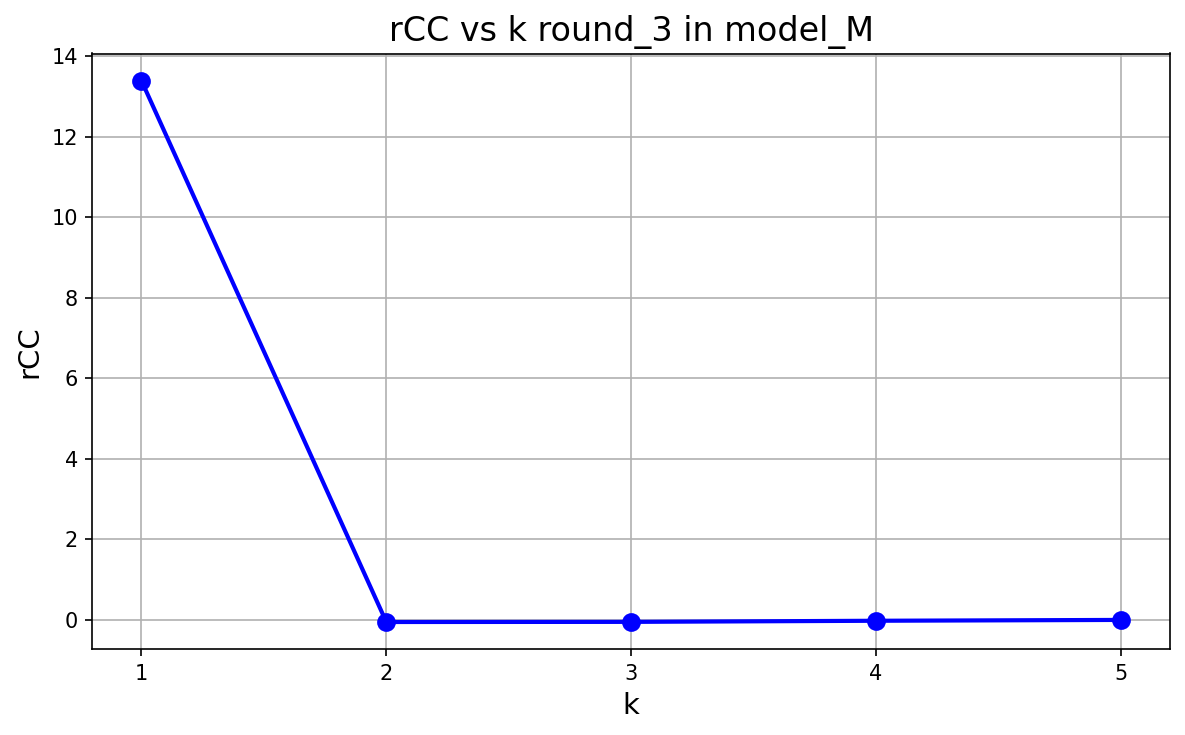

Optimal number of parameters to estimate for M: 2


In [12]:
from middoe.sc_estima import estima
j = 3
ranking, k_optimal_value, rCC_values, J_k_values = estima(resultun, system, models, iden_opt, j, data)

C:\Users\Tadmin\PycharmProjects\middoe\middoe\iden_utils.py:531: RuntimeWarning: invalid value encountered in sqrt
  width, height = 2 * np.sqrt(vals)


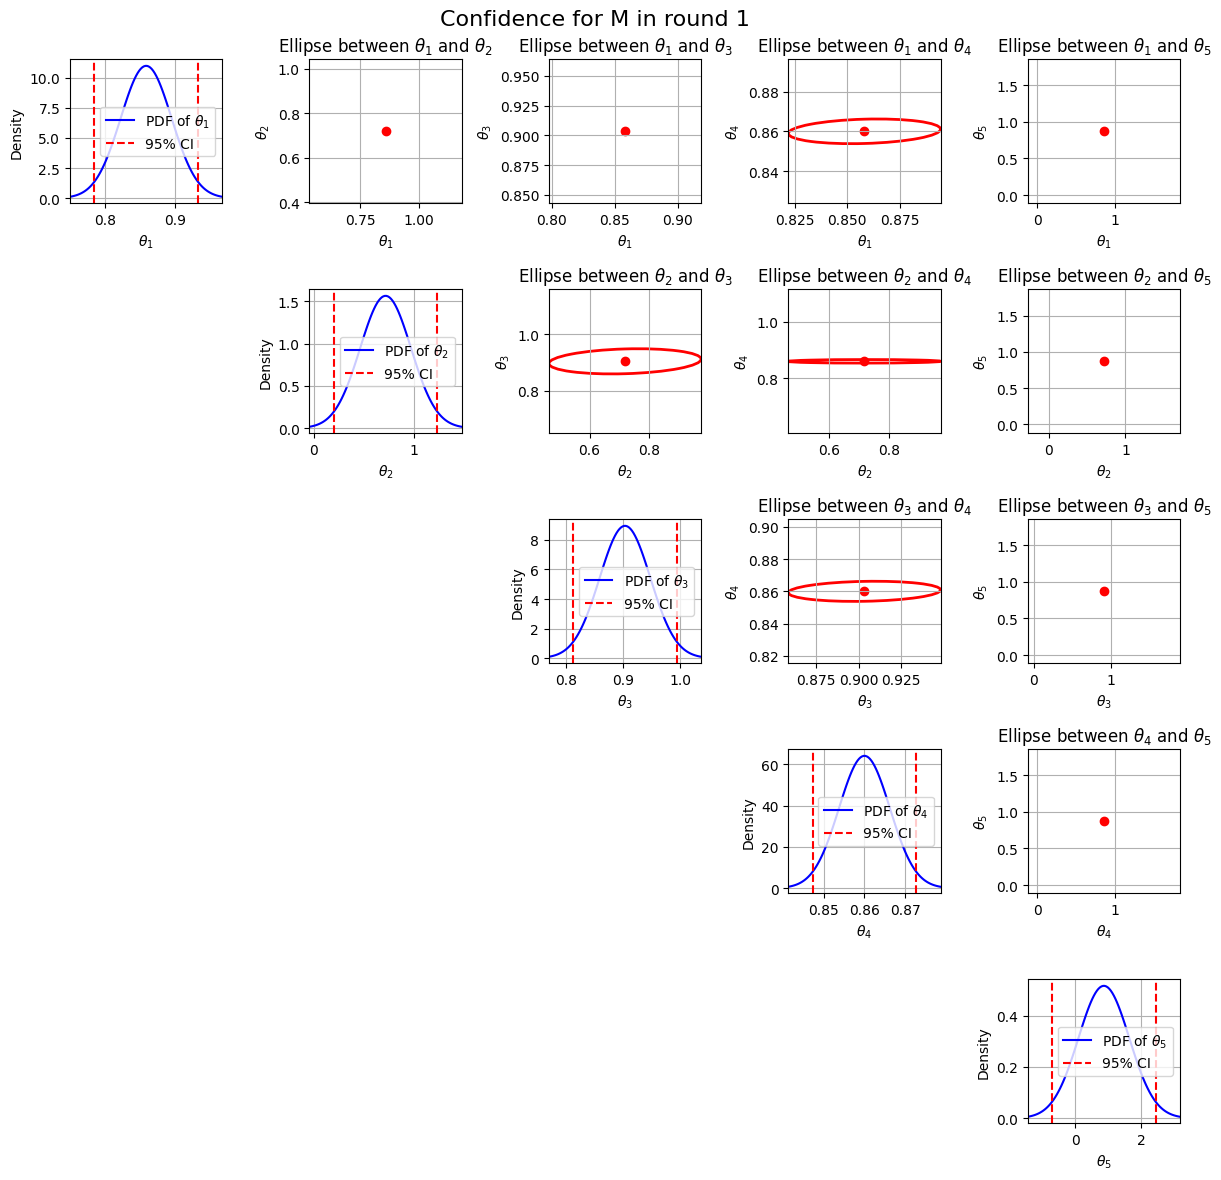

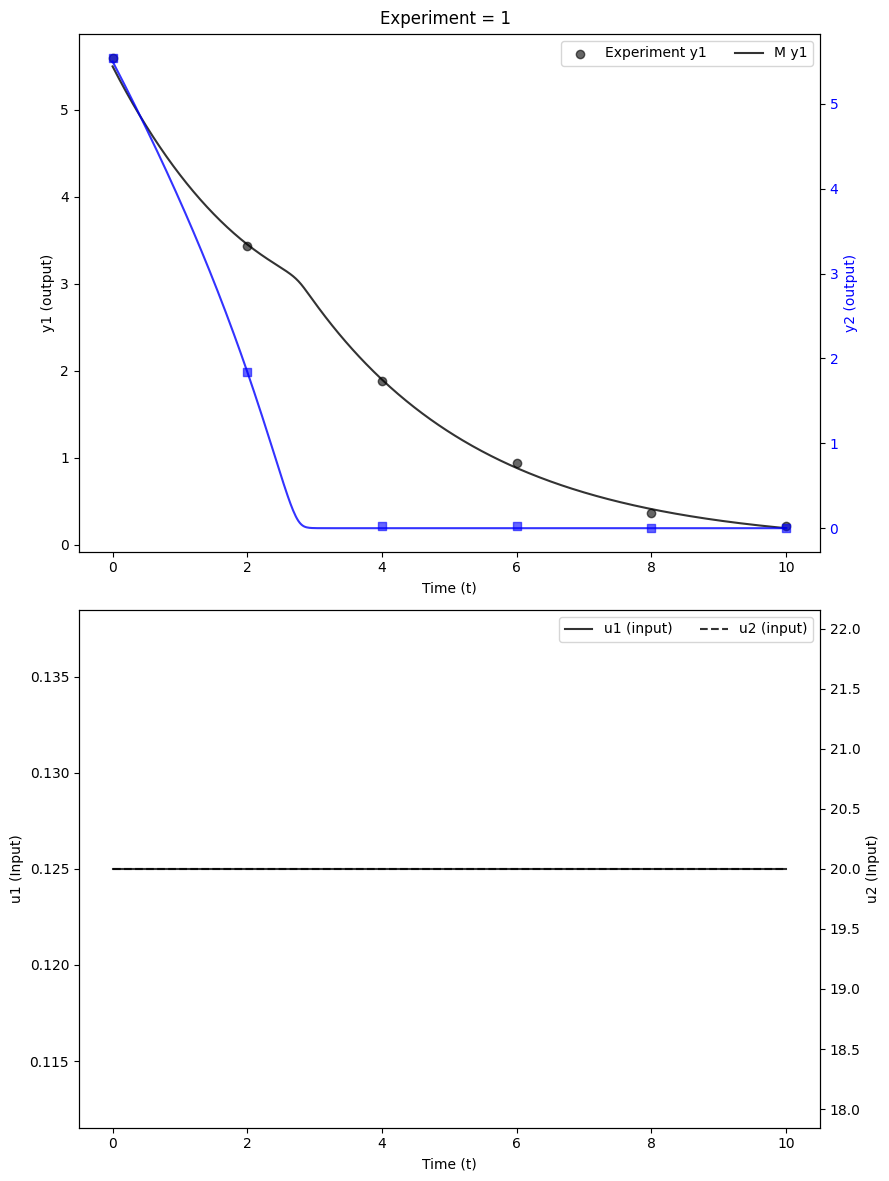

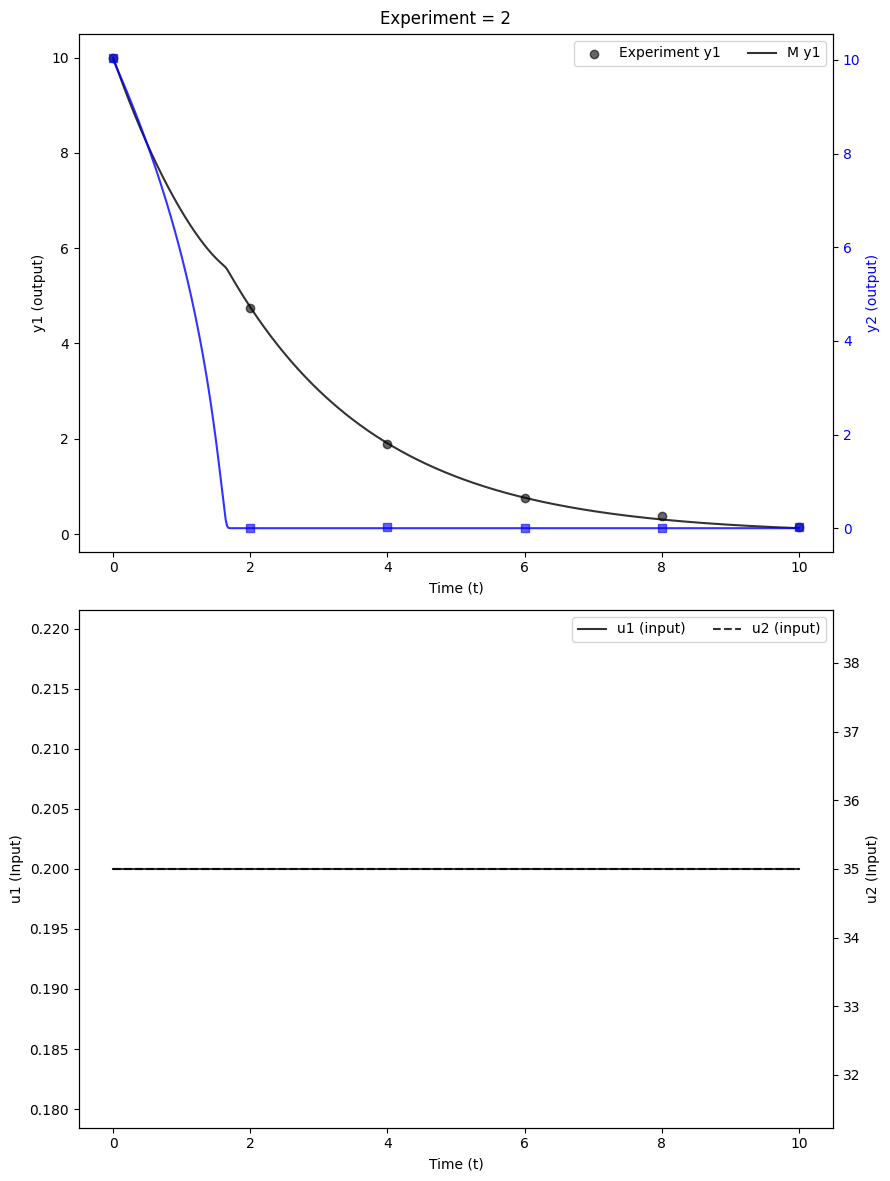

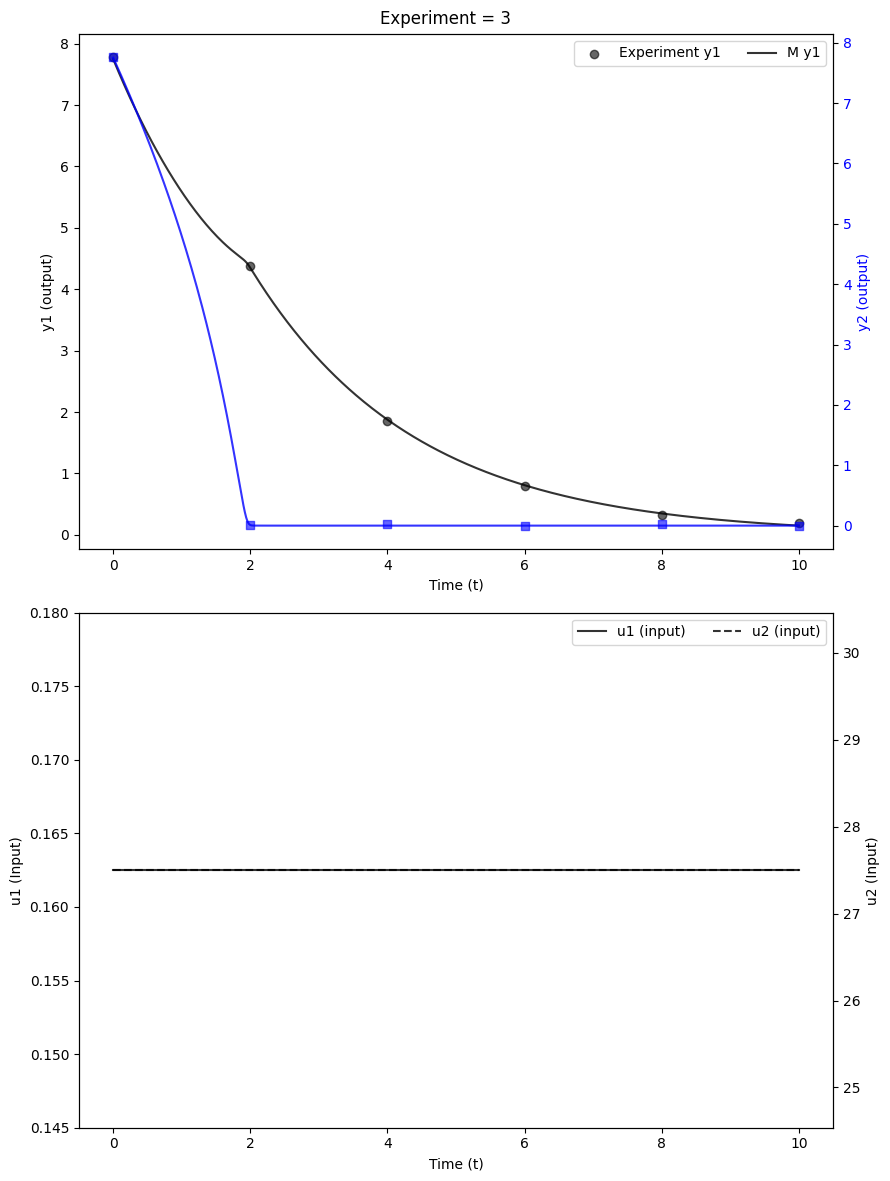

reference t value for model M and round 1: 2.0395134463964077
estimated t values for model M and round 1: [ 4.31153781  0.29877151  7.75305037 20.3162786   3.31254534]
P-value for model M and round 1: 100.0
eps for model M and round 1: 0.0001



{'M': np.float64(2.0395134463964077)}

In [13]:
from middoe.log_utils import  save_rounds
round_data={}
round = 1
save_rounds(round, resultun, theta_parameters, 'preliminary', round_data, models, scaled_params,iden_opt,solver_parameters, obs, data, system, ranking= ranking, k_optimal_value= k_optimal_value, rCC_values= rCC_values, J_k_values= J_k_values)

{'M': [3, 0, 2, 1, 4]}
2 params


In [27]:
theta_n1 = [0.3192622662340285, 0.2580117227908588] # nominal values +40%
theta_min1 = [0.155,  0.125]   # minimum values -50%
theta_max1 = [0.465,  0.375]  # maximum values +50%
theta_maxs1 = [hi / nom for hi, nom in zip(theta_max1, theta_n1)]
theta_mins1 = [lo / nom for lo, nom in zip(theta_min1, theta_n1)]

In [28]:
models = { # Settings related to the rival models and their parameters
    'can_m': ['M'],  # Active solvers (rival models) to be used in the experiment
    'krt': {'M': 'pys'},  # Kernel type for each model, 'pys' for python standalone scripts, 'pym' for middoe.krnl_models, 'gpr' for gPAS models
    # type of the model interface, 'pym' for middoe.krnl_models, 'gpr' for gPAS models, function name for globally defined functions, 'pys' for python standalone scripts
    'creds': {'M': '@@TTmnoa698'},
    # credentials for gPAS models, if not needed, leave empty
    'src': {'M': 'C:/Users/Tadmin/PycharmProjects/middoe/tests/case study case study 2 poster/model2.py'},
    # for now for gPAS readable files, or python standalone scripts

    'theta': { # Theta parameters for each models
        'M': theta_n1
    },
    't_u': { # Maximum bounds for theta parameters (based on normalized to'f20': theta20mins, 1)
        'M': theta_maxs1
    },
    't_l': { # Minimum bounds for theta parameters (based on normalized to 1)
        'M': theta_mins1
    }
}

In [29]:
iden_opt = { # Settings for the parameter estimation process
    'meth': 'Ls',  # optimisation method, 'G': Global Differential Evolution, 'Ls': Local SLSQP, 'Ln': Local Nelder-Mead
    'init': None,   # use 'rand' to have random starting point and use None to start from theta_parameters nominal values (to be avoided in insilico studies)
    'eps': 1e-4,  # perturbation size of parameters in SA FDM method (in a normalized to 1 space)
    #usually 1e-3, or None to perform a mesh independency test, and auto adjustment
    'ob': 'WLS',  #loss function, 'LS': least squares, 'MLE': maximum likelihood, 'Chi': chi-square, 'WLS': weighted least squares
    'c_plt': True, # plot the confidence volumes
    'f_plt': True, # plot the fitting results
    'plt_s': True, # show plots while saving
    'log': True # log the results
}

In [30]:
from middoe.iden_parmest import parmest
resultpr = parmest(system, models, iden_opt, data)

Objective function: 'WLS'| model 'M' | CPU time 0.1387 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1235 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1429 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1071 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1348 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1475 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1406 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1311 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1262 seconds.
parameter estimation for model M concluded- success: True



In [31]:
from middoe.iden_uncert import uncert
uncert_results = uncert(data, resultpr, system, models, iden_opt)
resultun = uncert_results['results']
theta_parameters = uncert_results['theta_parameters']
solver_parameters = uncert_results['solver_parameters']
scaled_params = uncert_results['scaled_params']
obs = uncert_results['obs']

Estimated parameters of M: [0.319257100546118, 0.2580084129608955]
True parameters of M: [0.3192622662340285, 0.2580117227908588]
LS objective function value for M: 0.0349029324319198
T-values of model M: [68.44615347 51.19646054]
P-value of model:M is 100.0 for model discrimination
R2 values for responses in model M:
  y1: 0.9998
  y2: 1.0000


C:\Users\Tadmin\PycharmProjects\middoe\middoe\iden_utils.py:531: RuntimeWarning: invalid value encountered in sqrt
  width, height = 2 * np.sqrt(vals)


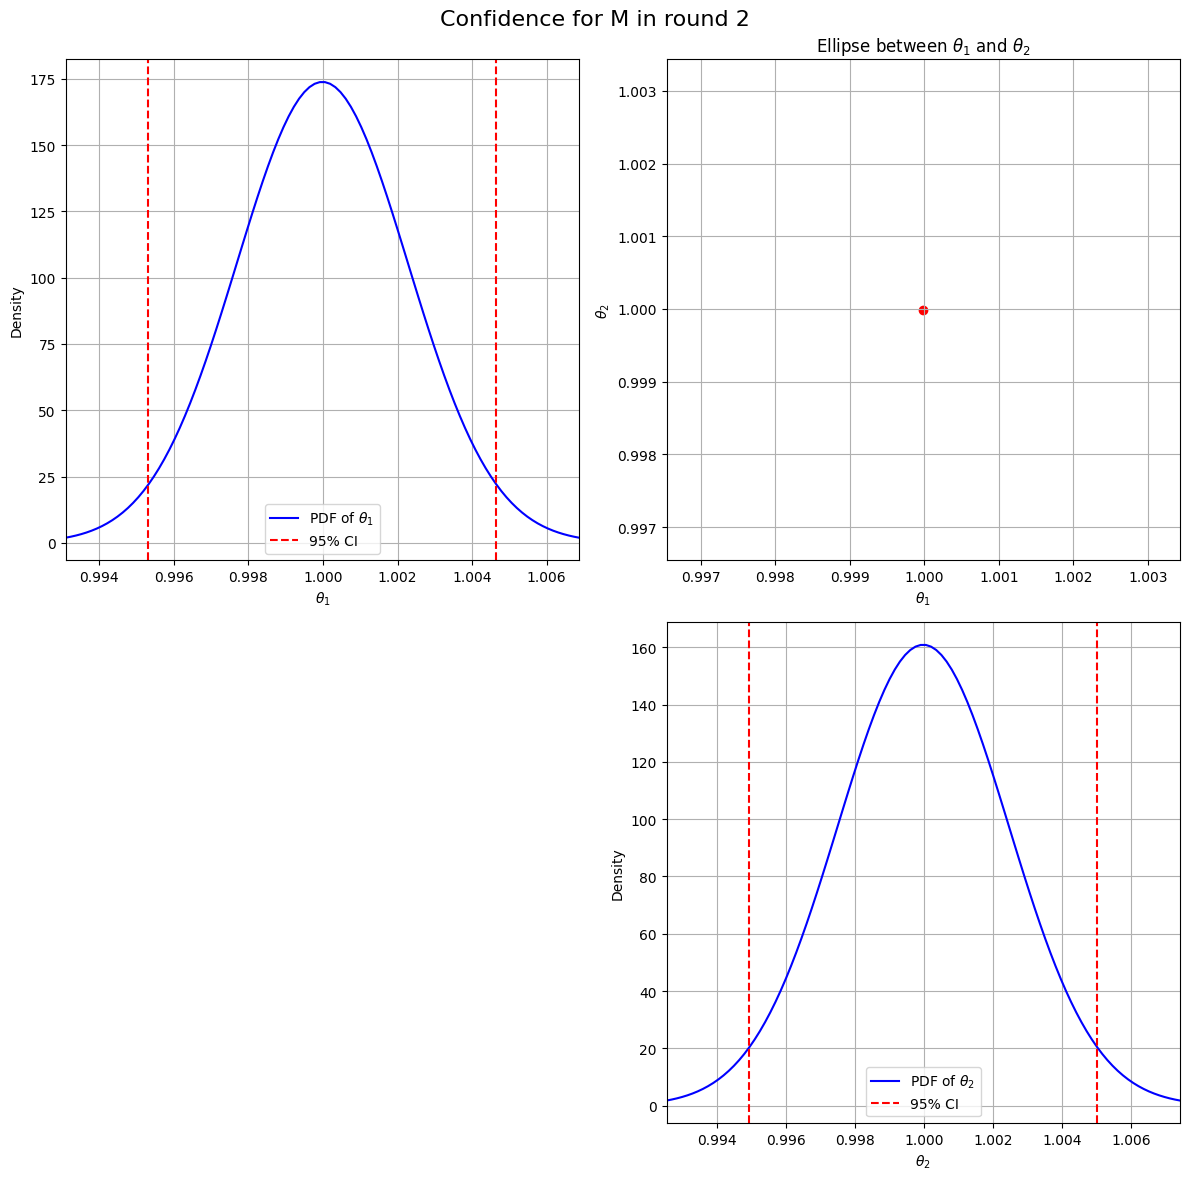

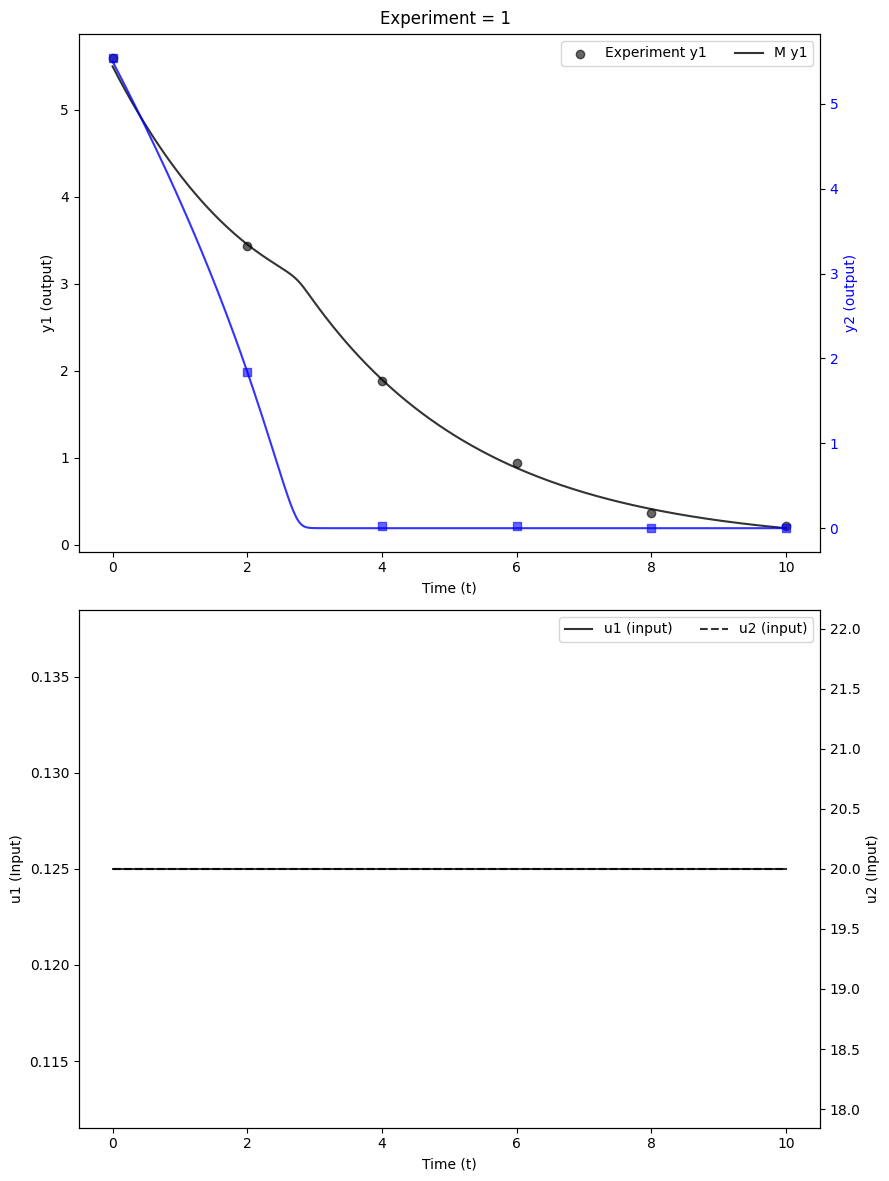

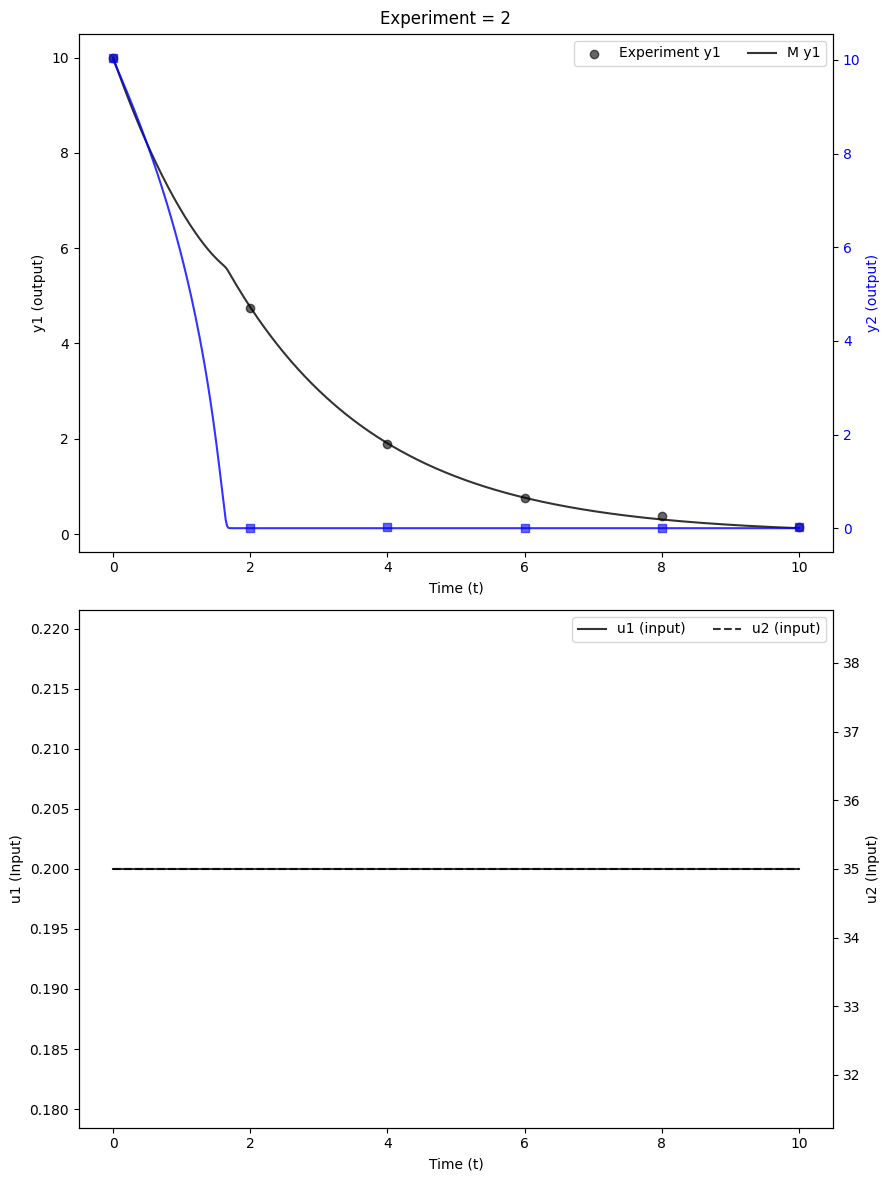

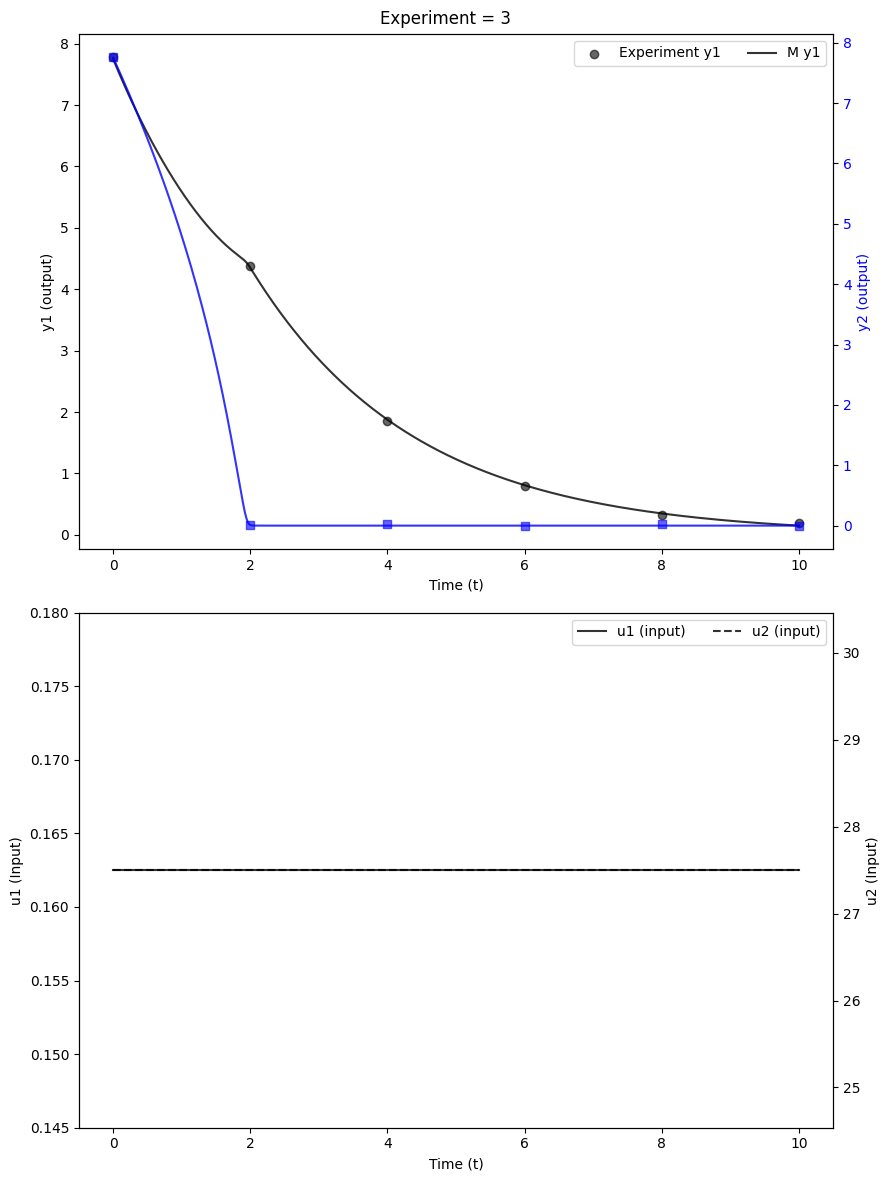

reference t value for model M and round 2: 2.032244509317718
estimated t values for model M and round 2: [68.44615347 51.19646054]
P-value for model M and round 2: 100.0
eps for model M and round 2: 0.0001



{'M': np.float64(2.032244509317718)}

In [33]:
from middoe.log_utils import  save_rounds
round_data={}
round = 2
save_rounds(round, resultun, theta_parameters, 'preliminary', round_data, models, scaled_params,iden_opt,solver_parameters, obs, data, system, ranking= ranking, k_optimal_value= k_optimal_value, rCC_values= rCC_values, J_k_values= J_k_values)

In [34]:
from middoe.log_utils import save_to_jac
save_to_jac(round_data, purpose="iden")

[INFO] Results saved to: C:\Users\Tadmin\PycharmProjects\middoe\tests\case study poster\iden_results.jac


INFO:middoe.iden_utils:Starting pcomp_plot.


Loaded: iden_results.jac
File not found: sensa_results.jac


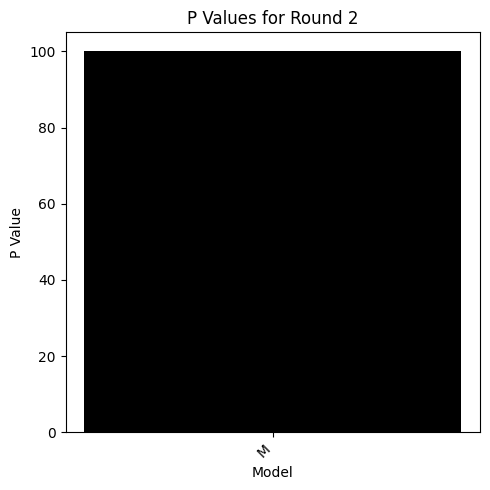

INFO:middoe.iden_utils:P values plot for Round 2 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\case study poster\post_processing\p_values_round_2.png.
INFO:middoe.iden_utils:Starting tcomp_plot.


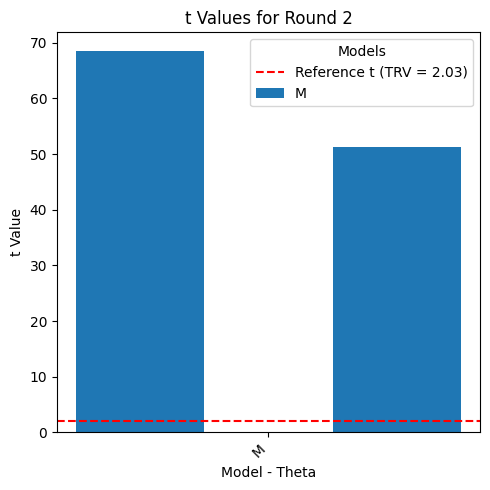

INFO:middoe.iden_utils:T values plot for Round 2 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\case study poster\post_processing\t_values_round_2.png.


Post-processing model: M


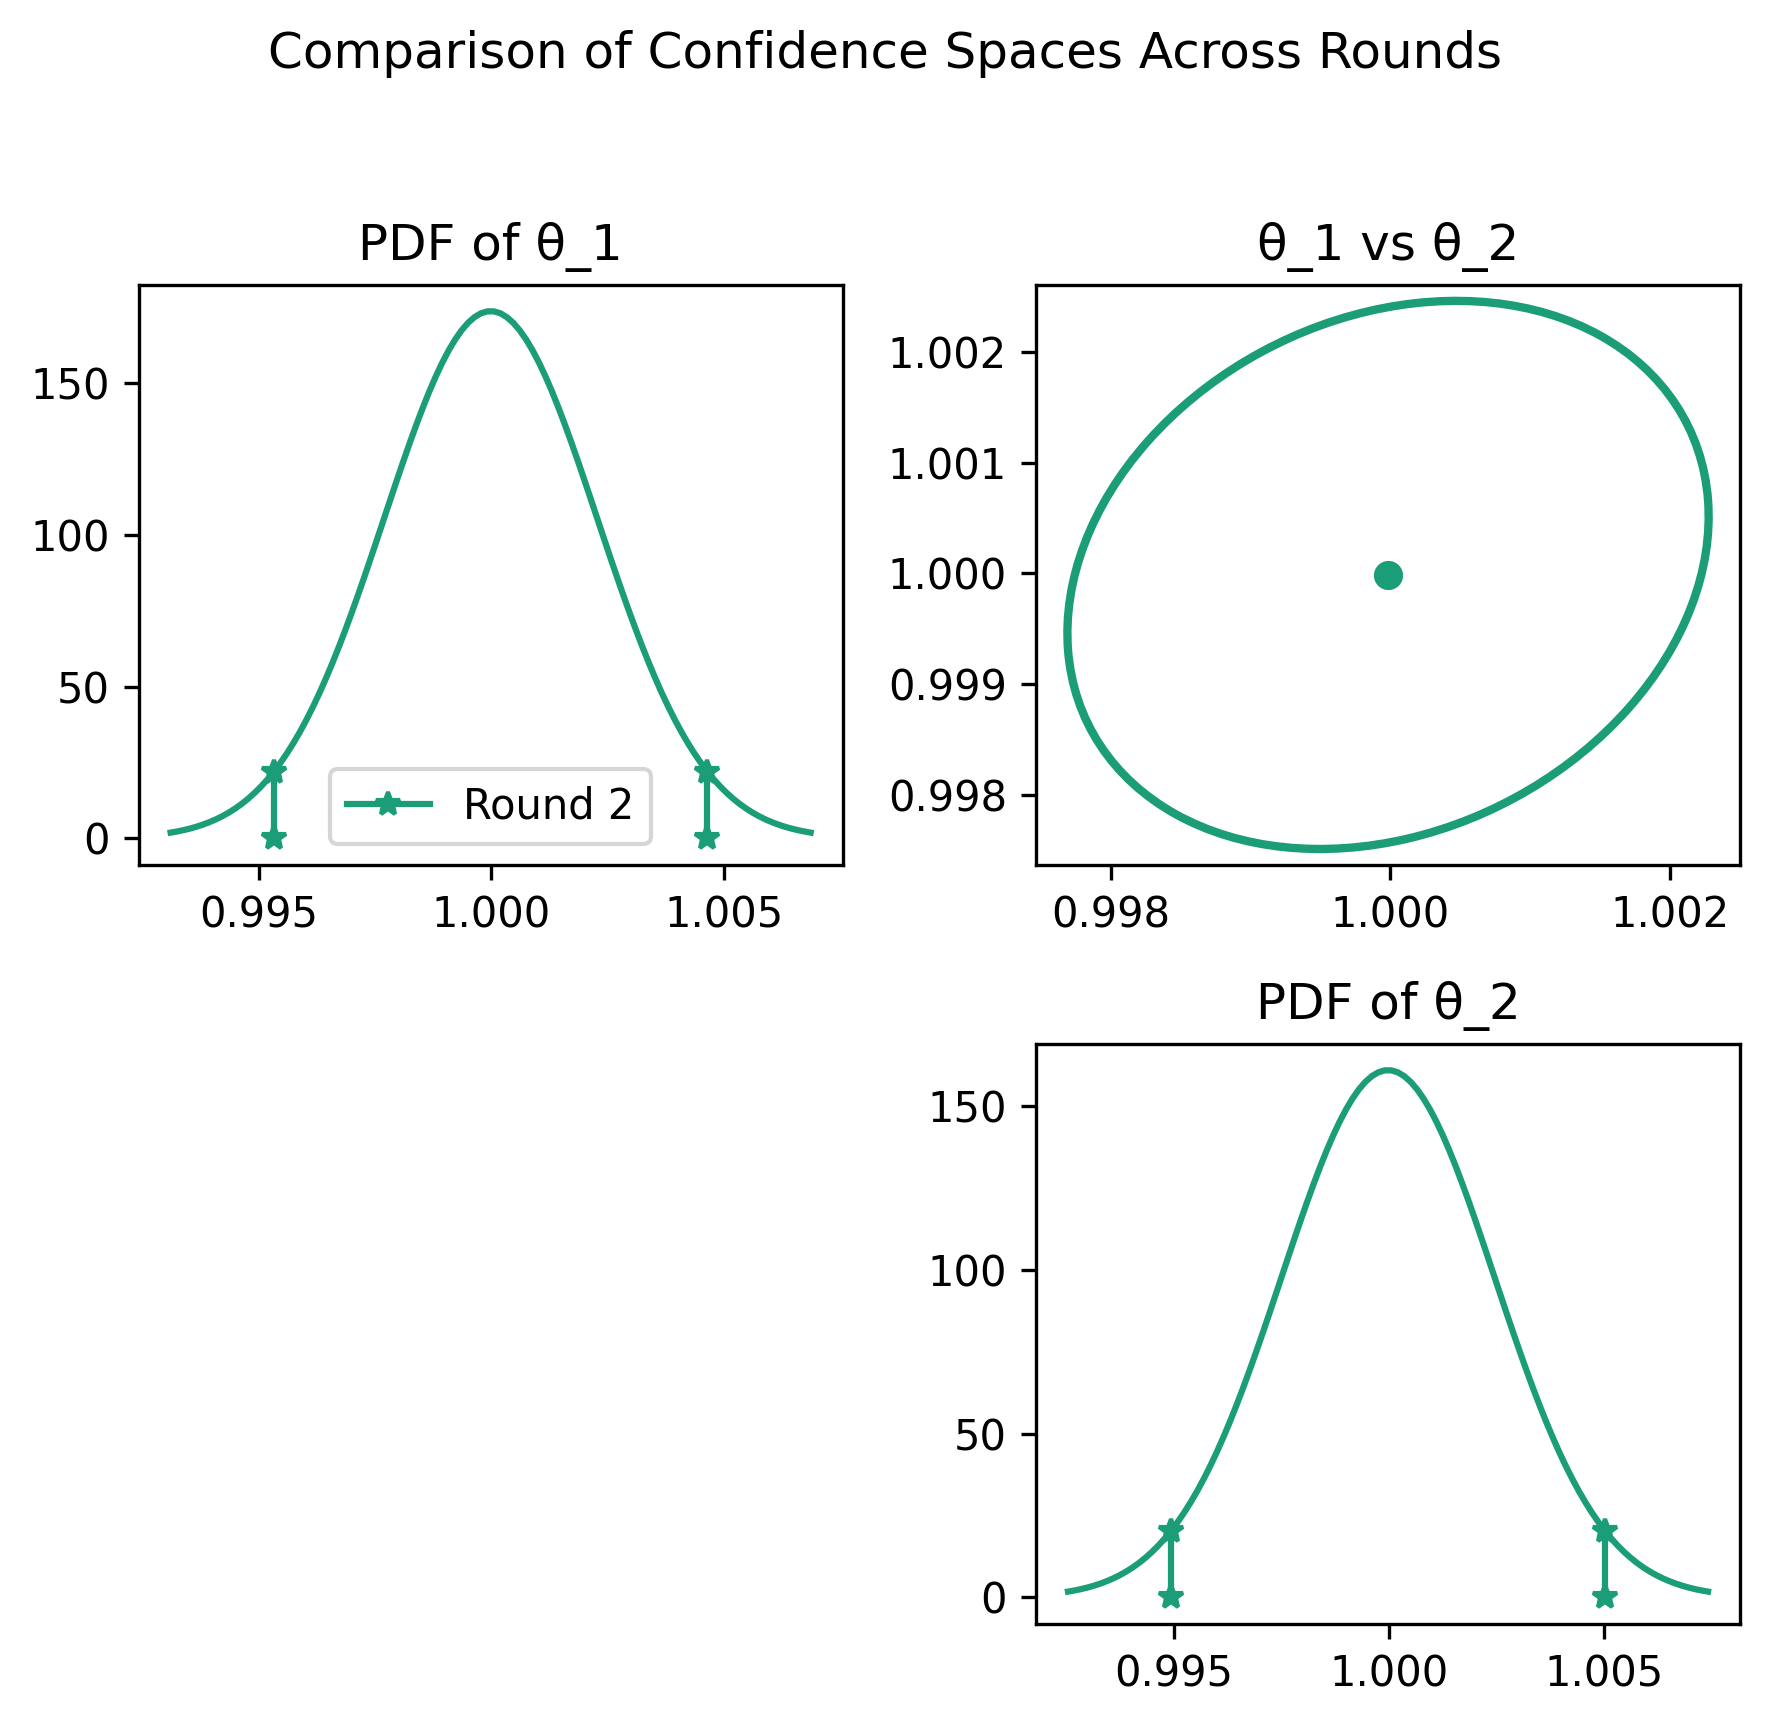

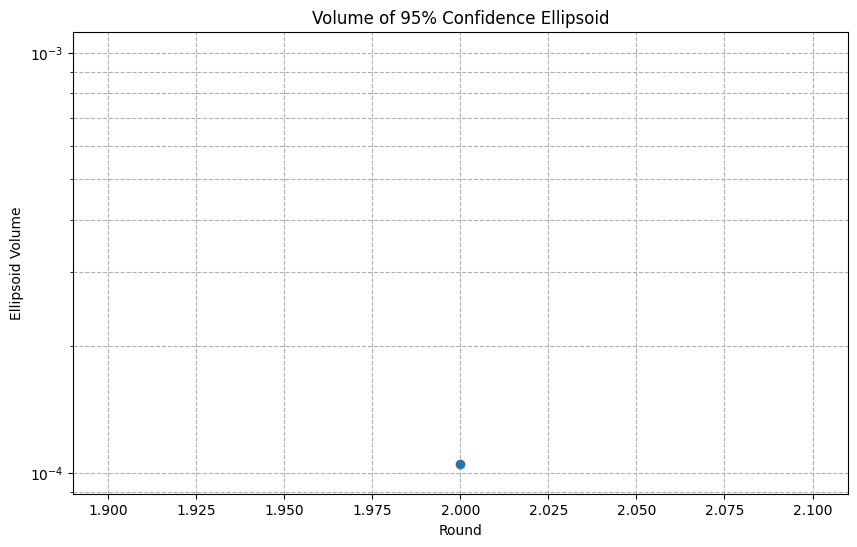

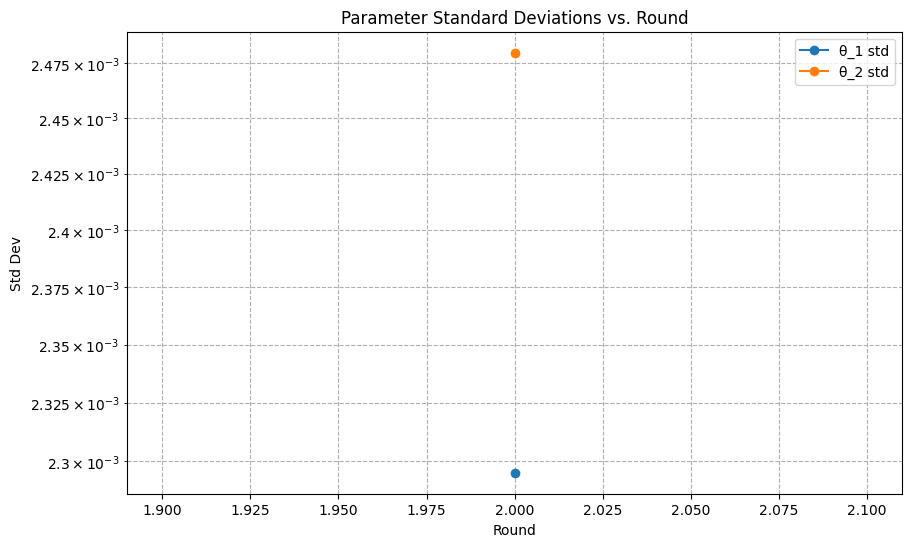

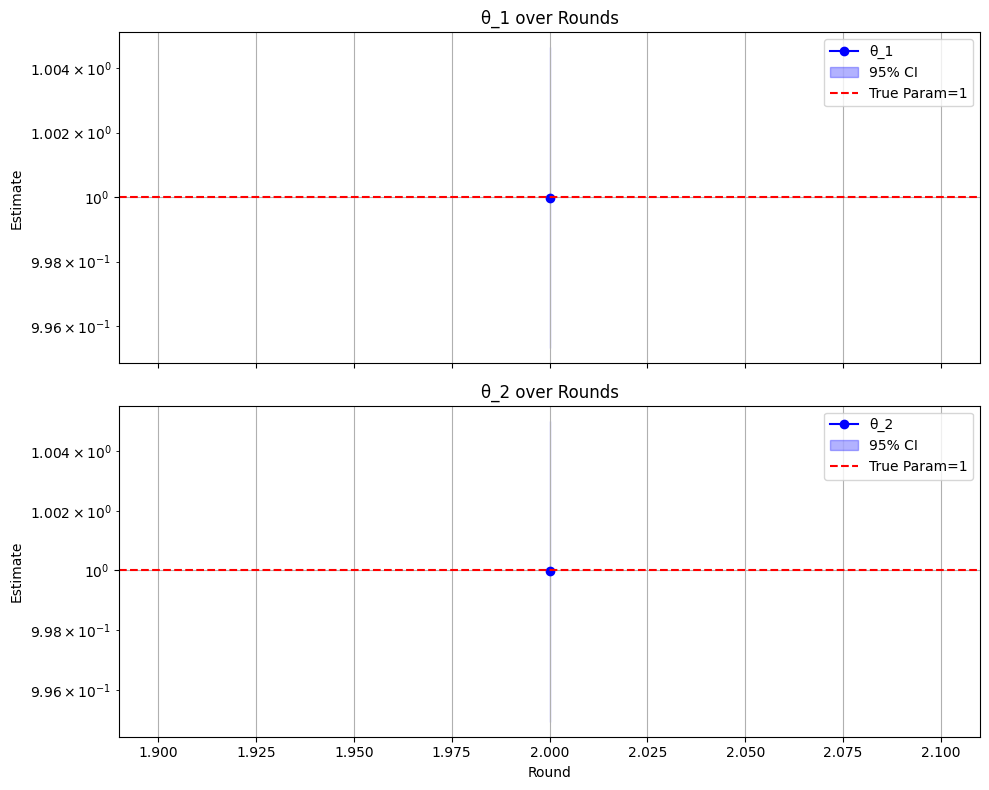

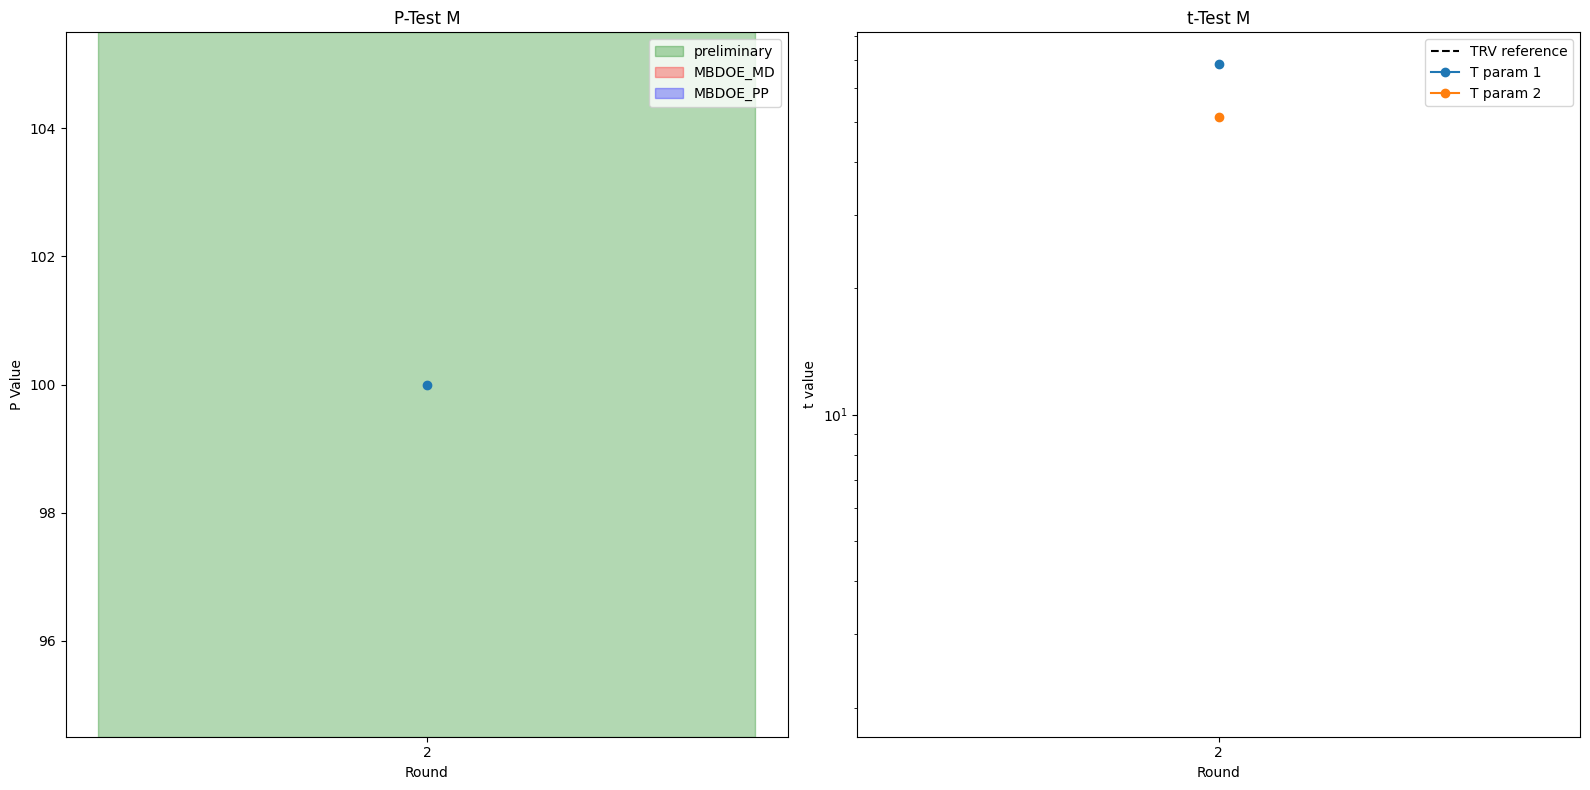

INFO:middoe.iden_utils:Skipping Round 1: not found in round_data.
INFO:middoe.iden_utils:Reporter wrote data for Round 2 to 'C:\Users\Tadmin\PycharmProjects\middoe\tests\case study poster\post_processing\M_report_2.xlsx'.
INFO:middoe.iden_utils:Summary written to 'C:\Users\Tadmin\PycharmProjects\middoe\tests\case study poster\post_processing\M_report_summary.txt'.


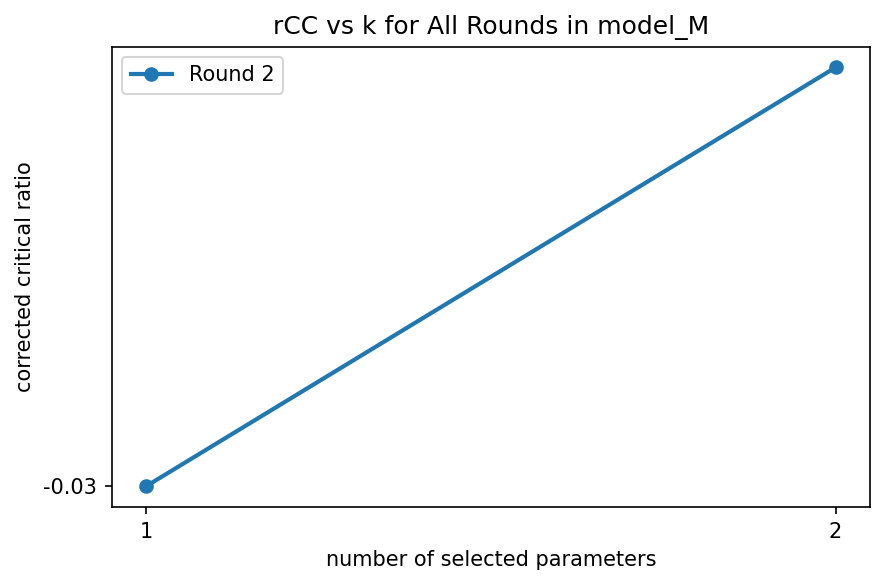

Plot saved in C:\Users\Tadmin\PycharmProjects\middoe\tests\case study poster\post_processing\estimability
Post-processing completed for: M


In [35]:

from middoe.log_utils import load_from_jac

results = load_from_jac()
iden = results['iden']

from middoe.iden_utils import run_postprocessing
run_postprocessing(
    round_data=results['iden'],
    solvers=['M'],
    selected_rounds=[ 1, 2],
    plot_global_p_and_t=True,
    plot_confidence_spaces=True,
    plot_p_and_t_tests=True,
    export_excel_reports=True,
    plot_estimability=True
)